In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from IPython.display import display
pd.set_option("display.max_rows", None)

import warnings
warnings.filterwarnings("ignore")

# Overview

Following is an exploratory data analysis of the Behavioral Risk Factor Surveillance System (BRFSS) 2013 data set. 

The Behavioral Risk Factor Surveillance System (BRFSS) is an ongoing surveillance system designed to measure behavioral risk factors for the non-institutionalized adult population living in the United States. The objective is to collect data on preventive health practices and risk behaviors that are linked to chronic diseases, injuries, and preventable infectious diseases. 

Data is collected by landline telephone and cellular telephone-based surveys from a randomly selected adult in a household. Doing so implies any inference made on such data should be generalizable to the entirety of the US population. As well, the scope of inference is limited to generalizability by observational study - relationships discovered may indicate association, but not causation.

##  Import Data

In [76]:
# Import csv
df = pd.read_csv('2013.csv')
pd.options.display.max_columns = None

In [77]:
# Number of columns
df.shape

(491773, 336)

## Research Question 1

What is the relationship (if any) between average number of drinks and general health split by gender?

Variables: genhlth(Categorical), sex(Categorical), avedrnk2(Numerical)

In [78]:
# EDA: General Health and Avg Number of drinks 
col_names = ['GENHLTH','SEX', 'AVEDRNK2']
alcohol_health = df[col_names]
alcohol_health.head()

,GENHLTH,SEX,AVEDRNK2
0,4.0,2.0,2.0
1,3.0,2.0,NaN
2,3.0,2.0,4.0
3,2.0,2.0,2.0
4,3.0,1.0,2.0


In [81]:
# Rename SEX
alcohol_health["SEX"] = alcohol_health.SEX.replace({1:'Male', 2:'Female'})

# Rename GENHLTH
gen_health = {1:'Excellent', 2:'Very Good', 3:'Good', 4:'Fair', 5:'Poor', 7:np.NaN, 9:np.NaN}
alcohol_health["GENHLTH"] = alcohol_health.GENHLTH.replace(gen_health)

# Drop NA
alcohol_health.dropna(inplace=True)


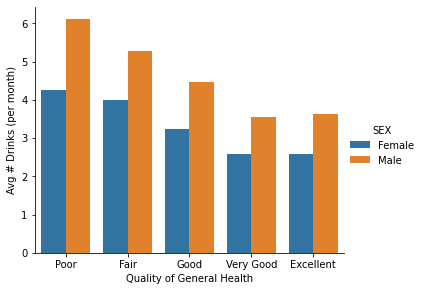

In [147]:
# Graph results
ax = sns.catplot(x="GENHLTH", y="AVEDRNK2", hue='SEX',
            data=alcohol_health,
            kind="bar",
            ci=None,
            order=["Poor", "Fair", "Good", "Very Good", "Excellent"])
# Set labels
ax.set(xlabel="Quality of General Health",
        ylabel="Avg # Drinks (per month)")

ax.fig.set_size_inches(6,4)

plt.show()

### Result

Individuals of higher quality are associated with drinking less frequently, and Male's are associated with drinking more than females

## Research Question 2

What is the relationship (if any) between time slept and the number of bad mental health days over the last 30 days. Are there significant differences between working out and not working out? 

Variables: sleptim1(Numerical), menthlth(Numerical), exerany2(Categorical)
            

In [109]:
sleep_menhlth = df[["SLEPTIM1", "MENTHLTH", "EXERANY2"]]

In [118]:
# Repalce missing with NA and rename EXERANY2
sleep_menhlth["MENTHLTH"] = sleep_menhlth.MENTHLTH.replace({77: np.NaN, 99:np.NaN, 88: np.NaN})
sleep_menhlth["SLEPTIM1"] = sleep_menhlth.SLEPTIM1.replace({77: np.NaN, 99:np.NaN})
sleep_menhlth["EXERANY2"] = sleep_menhlth.EXERANY2.replace({1:True, 2: False, 7: np.NaN, 9:np.NaN})

# Drop NA 
sleep_menhlth.dropna(inplace=True)

sleep_menhlth.head()

12229

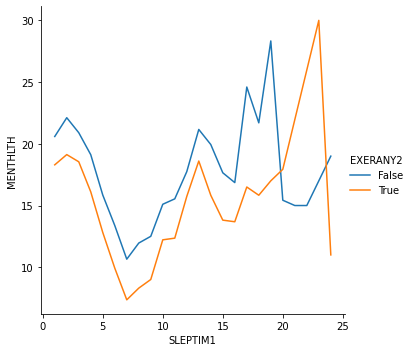

In [140]:
# Graph scatter plot
sns.relplot(x="SLEPTIM1", y="MENTHLTH", data=sleep_menhlth, kind="line", ci=None, hue="EXERANY2")

### Result

6-8 hours of sleep and exercise are associated with fewer bad mental health days
